<a href="https://colab.research.google.com/github/drewkostelecky/lab-4-drewkostelecky/blob/main/DATA_301_Lab_4_Drew_Kostelecky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Beer

Your goal is to train a model to predict the bitterness of a beer (in International Bittering Units, or IBU), given features about the beer. You can acquire the data in two places:

- on [Kaggle](https://www.kaggle.com/c/beer2020/data) 
- on [Github](https://github.com/dlsun/pods/tree/master/data/beer) (https://dlsun.github.io/pods/data/beer/beer_train.csv and https://dlsun.github.io/pods/data/beer/beer_test.csv )

A description of the variables is available [here](https://www.kaggle.com/c/beer2020/data).


We would like to predict **ibu** using a $20$-nearest neighbors model.

There are three features that have to do with the physical properties of the beer:  **abv**, **srm**, **original gravity**

There are two "cultural" features that have to do with how/when the beer is traditionally served: **glass**, **available**

Consider predicting **ibu** from 
(a) Only the physical features
(b) Only the cultural features
(c) All five features

In [9]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/beer/"
beer_train = pd.read_csv(data_dir + "beer_train.csv")
beer_train["srm_quant"] = beer_train["srm"].map(lambda x: 41 if x == "Over 40" else int(x))
beer_train

,id,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm,srm_quant
0,0,8.2,"Available at the same time of year, every year.",A Belgian-Abbey-Style Tripel that is big in al...,NaN,31.0,N,LoonyToonTripel,1.070,8,8
1,1,5.7,"Available at the same time of year, every year.",Covert Hops is a crafty ale. Its stealthy dark...,Pint,45.0,N,Covert Hops,1.056,35,35
2,2,5.8,"Available at the same time of year, every year.",This is a traditional German-style Marzen char...,Mug,25.0,N,Oktoberfest,1.048,10,10
3,3,5.5,Available year round as a staple beer.,A West Coast-Style Pale Ale balancing plenty o...,Pint,55.0,N,Pale Ale,1.044,5,5
4,4,4.8,Available year round as a staple beer.,This Bombshell has a tantalizing crisp and cle...,Pint,11.4,N,Head Turner Blonde Ale,1.045,3,3
...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,5.5,Available year round as a staple beer.,"Taking its cues from “Three Threads”, a barten...",Pint,33.0,N,Mayflower Porter,1.040,Over 40,41
5996,5996,11.0,"Available at the same time of year, every year.",Our barley wine is what would be considered an...,NaN,30.0,N,Barbieswine,1.085,20,20
5997,5997,5.2,Available year round as a staple beer.,Our version of a west coast pale ale pushes th...,Pint,45.0,N,Canuck Pale Ale,1.044,8,8
5998,5998,6.2,Limited availability.,Aquarius White IPA combines the phenolic and e...,NaN,50.0,N,Aquarius,1.044,2,2


In [10]:
beer_test = pd.read_csv(data_dir + "beer_test.csv")
beer_test["srm_quant"] = beer_train["srm"].map(lambda x: 41 if x == "Over 40" else int(x))
beer_test.head()

,id,abv,available,description,glass,ibu,isOrganic,name,originalGravity,srm,srm_quant
0,6000,10.0,Limited availability.,A classic Belgian Trappist style strong ale wi...,Tulip,NaN,N,She WILL!,1.084,17,8
1,6001,5.2,Available year round as a staple beer.,An American-style of Pale Ale brewed with a ba...,Pint,NaN,N,Defender American Pale Ale,1.044,22,35
2,6002,4.0,Available during the winter months.,"This amber wheat ale has a balanced malt body,...",Tulip,NaN,Y,Hazel,1.036,19,10
3,6003,10.2,Available year round as a staple beer.,A uniquely large beer developed by taking our ...,Pint,NaN,N,Cinderella’s Twin Double IPA,1.087,11,5
4,6004,6.0,Limited availability.,An American red ale with crisp hop flavor.,NaN,NaN,N,Independence Ale,1.048,14,3


## Question 1
Let's see how the distance metric, the scaling method, and the model influence prediction accuracy. 

Consider only the *physical* features. Train a **20**-nearest-neighbor model to predict **ibu**. Try fitting models with different distance metrics and scaling methods. 

Which distance metric and/or scaling method gives the best prediction accuracy? Why do you think that might be?

In [11]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=beer_train[["abv", "originalGravity", "srm_quant"]], y=beer_train["ibu"])
beer_train_predicts_euc_p_std = pipeline.predict(beer_train[["abv", "originalGravity", "srm_quant"]])
rmse_euc_p_std = np.sqrt(np.mean((beer_train_predicts_euc_p_std - beer_train["ibu"])**2))
rmse_euc_p_std

21.488684506944036

In [12]:
from sklearn.preprocessing import Normalizer

pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=beer_train[["abv", "originalGravity", "srm_quant"]], y=beer_train["ibu"])
beer_train_predicts_euc_p_norm = pipeline.predict(beer_train[["abv", "originalGravity", "srm_quant"]])
rmse_euc_p_norm = np.sqrt(np.mean((beer_train_predicts_euc_p_norm - beer_train["ibu"])**2))
rmse_euc_p_norm

23.06072629247143

In [13]:
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=beer_train[["abv", "originalGravity", "srm_quant"]], y=beer_train["ibu"])
beer_train_predicts_man_p_std = pipeline.predict(beer_train[["abv", "originalGravity", "srm_quant"]])
rmse_man_p_std = np.sqrt(np.mean((beer_train_predicts_man_p_std - beer_train["ibu"])**2))
rmse_man_p_std

21.157374503435793

In [14]:
pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=beer_train[["abv", "originalGravity", "srm_quant"]], y=beer_train["ibu"])
beer_train_predicts_man_p_norm = pipeline.predict(beer_train[["abv", "originalGravity", "srm_quant"]])
rmse_man_p_norm = np.sqrt(np.mean((beer_train_predicts_man_p_norm - beer_train["ibu"])**2))
rmse_man_p_norm

23.097738903581902

It seems like the standardizer gives a better prediction accuracy. This could be because standardizing tends to work better with outlier values.

## Question 2

Repeat Question 1, this time using the *cultural* features.

In [15]:
X_train = pd.get_dummies(beer_train[["available", "glass"]])

In [16]:
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_euc_c_std = pipeline.predict(X_train)
rmse_euc_c_std = np.sqrt(np.mean((beer_train_predicts_euc_c_std - beer_train["ibu"])**2))
rmse_euc_c_std

28.36235247556609

In [17]:
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_man_c_std = pipeline.predict(X_train)
rmse_man_c_std = np.sqrt(np.mean((beer_train_predicts_man_c_std - beer_train["ibu"])**2))
rmse_man_c_std

28.322524824376387

In [18]:
pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_euc_c_norm = pipeline.predict(X_train)
rmse_euc_c_norm = np.sqrt(np.mean((beer_train_predicts_euc_c_norm - beer_train["ibu"])**2))
rmse_euc_c_norm

28.77022554699036

In [19]:
pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_man_c_norm = pipeline.predict(X_train)
rmse_man_c_norm = np.sqrt(np.mean((beer_train_predicts_man_c_norm - beer_train["ibu"])**2))
rmse_man_c_norm

28.82081337988188

The rmse values are now all really close so it is hard to say if one if better than the others. They are also higher than the values when we used physical factors, this could be because of less factors used or less possible values since they are dummy variables.

## Question 3

Finally, repeat Question 1, using *all* the features.

In [20]:
X_train = pd.get_dummies(beer_train[["available", "glass", "abv", "originalGravity", "srm_quant"]])

In [21]:
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_euc_b_std = pipeline.predict(X_train)
rmse_euc_b_std = np.sqrt(np.mean((beer_train_predicts_euc_b_std - beer_train["ibu"])**2))
rmse_euc_b_std

22.519230953447774

In [22]:
pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_man_b_std = pipeline.predict(X_train)
rmse_man_b_std = np.sqrt(np.mean((beer_train_predicts_man_b_std - beer_train["ibu"])**2))
rmse_man_b_std

22.136424168684055

In [23]:
pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="euclidean")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_euc_b_norm = pipeline.predict(X_train)
rmse_euc_b_norm = np.sqrt(np.mean((beer_train_predicts_euc_b_norm - beer_train["ibu"])**2))
rmse_euc_b_norm

23.537310399404383

In [24]:
pipeline = make_pipeline(
          Normalizer(),
          KNeighborsRegressor(n_neighbors=20, metric="manhattan")
)

pipeline.fit(X=X_train, y=beer_train["ibu"])
beer_train_predicts_man_b_norm = pipeline.predict(X_train)
rmse_man_b_norm = np.sqrt(np.mean((beer_train_predicts_man_b_norm - beer_train["ibu"])**2))
rmse_man_b_norm

23.101868918197216

The standard scaler again performs slightly better. It appears to perform slightly better with manhattan distance, although this may not be significant. Interestingly, our numbers not quite as good as same metrics with the physical features only.

## Question 4

Finally, let's determine the right value of $k$. Use the set of features, the distance metric, and the scaling method that you determined to be best (for $k=20$ nearest neighbors model) in Question 4. Fit $k$-nearest neighbor models for different values of $k$. Plot the training error and the estimated test error as functions of $k$, and determine the optimal value of $k$.

Because it gave us the best results in our training metrics, we will use standard scaler, manhattan distance, and only the physical features for our models.

In [32]:
beer_train_subset = beer_train.loc[:5000].copy()
beer_test_subset = beer_train.loc[5000:].copy()

In [35]:
from sklearn.metrics import mean_squared_error
model_accuracy = pd.DataFrame(columns=["K", "Train rmse", "Test rmse"])
for k in range(2, 40, 2):
  pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=k, metric="manhattan")
  )

  pipeline.fit(X=beer_train_subset[["abv", "originalGravity", "srm_quant"]], y=beer_train_subset["ibu"])
  beer_train_predicts = pipeline.predict(beer_train_subset[["abv", "originalGravity", "srm_quant"]])
  rmse_train = np.sqrt(mean_squared_error(beer_train_subset["ibu"], beer_train_predicts))

  beer_test_predicts = pipeline.predict(beer_test_subset[["abv", "originalGravity", "srm_quant"]])
  rmse_test = np.sqrt(mean_squared_error(beer_test_subset["ibu"], beer_test_predicts))

  model_accuracy = model_accuracy.append({"K": k, "Train rmse": rmse_train, "Test rmse": rmse_test}, ignore_index=True)

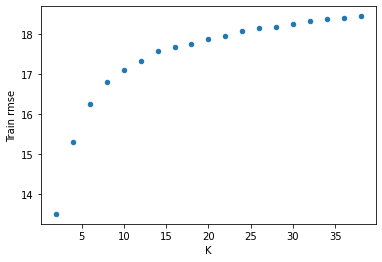

In [42]:
import matplotlib.pyplot as plt
train_plot = model_accuracy.plot.scatter(x="K", y="Train rmse")


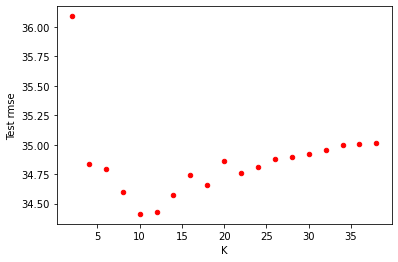

In [41]:
test_plot = model_accuracy.plot.scatter(x="K", y="Test rmse", c="red")


It looks like the optimal value of K is 10, using the test data. The optimal value of K appears to be 2 with the training data, but this make sense because since we are predicting on the training data itself, as we include more neighbors it will get less accurate. For this reason, it is much better to use the test metrics.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 4 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.